# Desafio 3 | Grupo 100 Viés | Turma 7 - Data Science
# RH - Predição de Attrition

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Análise Exploratória 

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [3]:
rh = pd.read_csv("rh_perfumaria_e_cosmeticos.csv",sep=';',
                encoding='cp1252',
                decimal=',')
pd.set_option('display.max_columns', None)
rh.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
365,46,No,Non-Travel,1144,Research & Development,7,4,Medical,1,487,3,Female,30,3,2,Manufacturing Director,3,Married,5258,16044,2,Y,No,14,3,3,80,0,7,2,4,1,0,0,0
202,34,No,Travel_Frequently,878,Research & Development,10,4,Medical,1,277,4,Male,43,3,1,Research Scientist,3,Divorced,3815,5972,1,Y,Yes,17,3,4,80,1,5,4,4,5,3,2,0
643,42,No,Travel_Rarely,1265,Research & Development,3,3,Life Sciences,1,894,3,Female,95,4,2,Laboratory Technician,4,Married,5231,23726,2,Y,Yes,13,3,2,80,1,17,1,2,5,3,1,3
1099,45,No,Travel_Rarely,538,Research & Development,1,4,Technical Degree,1,1553,1,Male,66,3,3,Healthcare Representative,2,Divorced,7441,20933,1,Y,No,12,3,1,80,3,10,4,3,10,8,7,7
222,37,No,Travel_Frequently,663,Research & Development,11,3,Other,1,306,2,Male,47,3,3,Research Director,4,Divorced,12185,10056,1,Y,Yes,14,3,3,80,3,10,1,3,10,8,0,7
760,53,No,Travel_Frequently,124,Sales,2,3,Marketing,1,1050,3,Female,38,2,3,Sales Executive,2,Married,7525,23537,2,Y,No,12,3,1,80,1,30,2,3,15,7,6,12
521,27,No,Travel_Frequently,1410,Sales,3,1,Medical,1,714,4,Female,71,4,2,Sales Executive,4,Divorced,4647,16673,1,Y,Yes,20,4,2,80,2,6,3,3,6,5,0,4
611,35,No,Travel_Rarely,950,Research & Development,7,3,Other,1,845,3,Male,59,3,3,Manufacturing Director,3,Single,10221,18869,3,Y,No,21,4,2,80,0,17,3,4,8,5,1,6
118,36,No,Travel_Rarely,922,Research & Development,3,2,Life Sciences,1,155,1,Female,39,3,1,Laboratory Technician,4,Divorced,2835,2561,5,Y,No,22,4,1,80,1,7,2,3,1,0,0,0
1124,39,No,Travel_Rarely,1462,Sales,6,3,Medical,1,1588,4,Male,38,4,3,Sales Executive,3,Married,8237,4658,2,Y,No,11,3,1,80,1,11,3,3,7,6,7,6


Text(0, 0.5, 'Frequence')

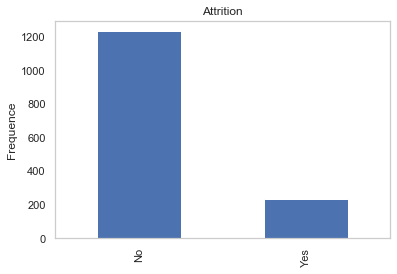

In [88]:
count_attrition = pd.value_counts(rh['Attrition'])
count_attrition.plot(kind='bar')
count_attrition
plt.title("Attrition")
plt.ylabel("Frequence")

Attrition Yes = 237 (19%)

Attrition No = 1233 (81%)


## PERGUNTA DE NEGÓCIO: O QUE FAZER PARA RETER OS TALENTOS?

In [4]:
rh.shape

(1470, 35)

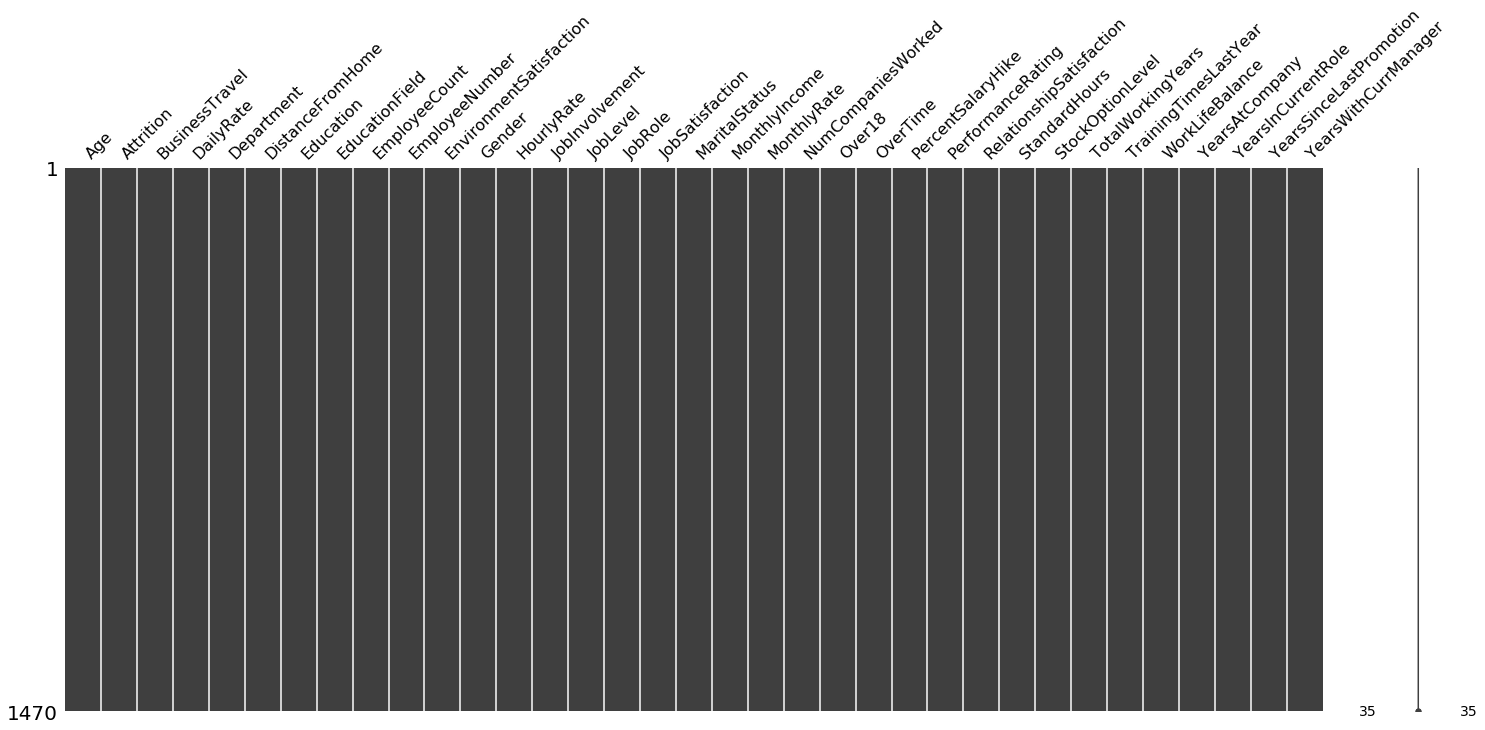

In [5]:
# verificando os dados NaNs
import missingno as msno
msno.matrix(rh)

In [6]:
rh.shape

(1470, 35)

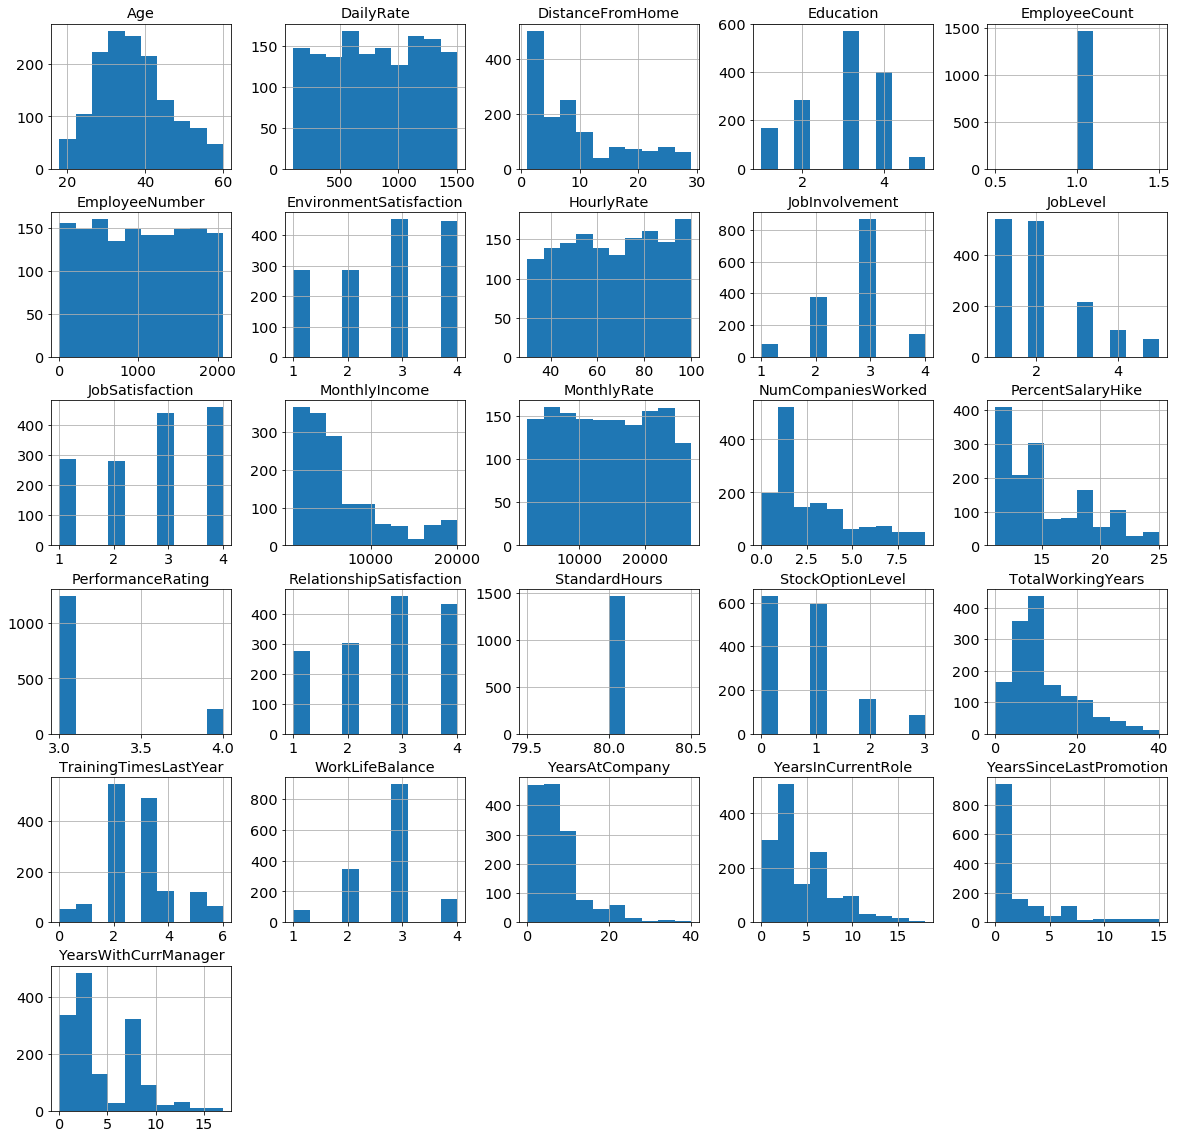

In [7]:
p = rh.hist(figsize = (20,20))

## Colunas a serem dropadas: valores únicos

In [8]:
## Dropando variáveis com valor único fixo
print(pd.value_counts(rh['EmployeeCount']))
print(pd.value_counts(rh['StandardHours']))
print(pd.value_counts(rh['Over18']))

1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64
Y    1470
Name: Over18, dtype: int64


In [9]:
rh=rh.drop('EmployeeNumber',axis=1)

In [10]:
rh=rh.drop('EmployeeCount', axis=1)
rh=rh.drop('StandardHours', axis=1)
rh=rh.drop('Over18',axis=1)

rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Dummies nas Variáveis Categóricas Preditoras

In [11]:
rh=pd.concat([rh, pd.get_dummies(rh.EducationField, prefix="EField", drop_first=True)],axis=1)
rh=rh.drop('EducationField',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.Gender, prefix="Gender", drop_first=True)],axis=1)
rh=rh.drop('Gender',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.BusinessTravel, prefix="BTravel", drop_first=True)],axis=1)
rh=rh.drop('BusinessTravel',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.Department, prefix="Department", drop_first=True)],axis=1)
rh=rh.drop('Department',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.JobRole, prefix="JobRole", drop_first=True)],axis=1)
rh=rh.drop('JobRole',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.MaritalStatus, prefix="MStatus", drop_first=True)],axis=1)
rh=rh.drop('MaritalStatus',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.OverTime, prefix="OverTime", drop_first=True)],axis=1)
rh=rh.drop('OverTime',axis=1)

rh.sample(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EField_Life Sciences,EField_Marketing,EField_Medical,EField_Other,EField_Technical Degree,Gender_Male,BTravel_Travel_Frequently,BTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MStatus_Married,MStatus_Single,OverTime_Yes
735,48,No,277,6,3,1,97,2,2,3,4240,13119,2,13,3,4,0,19,0,3,2,2,2,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
67,45,No,1339,7,3,2,59,3,3,1,9724,18787,2,17,3,3,1,25,2,3,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1391,38,No,1404,1,3,1,59,2,1,1,2858,11473,4,14,3,1,0,20,3,2,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
19,38,No,371,2,3,4,45,3,1,4,3944,4306,5,11,3,3,0,6,3,3,3,2,1,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
180,31,No,140,12,1,3,95,3,1,4,3929,6984,8,23,4,3,1,7,0,3,4,2,0,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1
432,34,No,1303,2,4,4,62,2,1,3,2768,8416,3,12,3,3,1,14,3,3,7,3,5,7,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
743,59,No,715,2,3,3,69,2,4,4,13726,21829,3,13,3,1,0,30,4,3,5,3,4,3,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
1,49,No,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1168,24,No,567,2,1,1,32,3,1,4,3760,17218,1,13,3,3,0,6,2,3,6,3,1,3,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1
653,50,No,881,2,4,1,98,3,4,1,17924,4544,1,11,3,4,1,31,3,3,31,6,14,7,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Frequence')

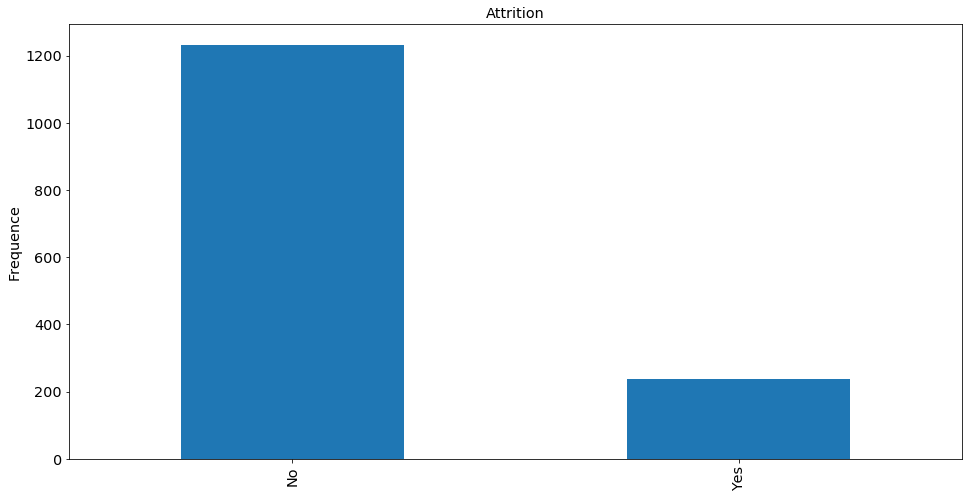

In [12]:
count_attrition = pd.value_counts(rh['Attrition'])
count_attrition.plot(kind='bar')
count_attrition
plt.title("Attrition")
plt.ylabel("Frequence")

## Dummies na Variável Target (Attrition)

In [13]:
y=rh['Attrition'].map({"No":0,"Yes":1})

In [14]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [15]:
#p=sns.pairplot(rh, hue = 'Attrition')

In [16]:
# Plotting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})

# Pre processing and manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

# metrics and hyperparameter optimization
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error
from skopt import dummy_minimize
from skopt import gp_minimize

# models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from lightgbm import LGBMClassifier, LGBMRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor

In [17]:
X=rh.drop('Attrition', axis=1)
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EField_Life Sciences', 'EField_Marketing', 'EField_Medical',
       'EField_Other', 'EField_Technical Degree', 'Gender_Male',
       'BTravel_Travel_Frequently', 'BTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Represe

## Dividindo o Dataset em Treino e Teste

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1029, 44), (441, 44), (1029,), (441,))

# Pipeline

In [44]:
# Construct some pipelines
pipe_svm = Pipeline([('scl', StandardScaler()),
                     #('pca', PCA(n_components=2)),
                     ('clf', svm.SVC(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
                    #('pca', PCA(n_components=2)),
                    ('clf', tree.DecisionTreeClassifier(random_state=42))])
# List of pipelines for ease of iteration
pipelines = [pipe_svm, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Support Vector Machine', 1: 'Decision Tree'}

## Resultado1 | Pipeline: SVM, DT, RandomForestClassifier - Dados desbalanceados

### Support Vector Machine (SVM)

In [45]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Support Vector Machine pipeline test accuracy: 0.880
Decision Tree pipeline test accuracy: 0.812


*Acurácia não é a métrica recomendado para variáveis com classes desbalanceadas

*A métrica recomendada é o Recall, ou seja, de todos os Attrition = 1 observados, qual  % o modelo acertou

In [47]:
#Support Vector Machine (SVM) Sem Balanceamento
#Recall_SVM = 0.15
from sklearn.metrics import classification_report
p_svm = pipe_svm.predict(X_test)
print(classification_report(y_test,p_svm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       380
           1       0.90      0.15      0.25        61

    accuracy                           0.88       441
   macro avg       0.89      0.57      0.59       441
weighted avg       0.88      0.88      0.84       441



### Decision Tree (DT)

In [49]:
#Decision Tree (DT) Sem Balanceamento
#Recall_DT = 0.46
         #melhorou em comparação ao LR e SVM, mas ainda longe de 1)
from sklearn.metrics import classification_report
p_dt = pipe_dt.predict(X_test)
print(classification_report(y_test,p_dt))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       380
           1       0.36      0.46      0.40        61

    accuracy                           0.81       441
   macro avg       0.63      0.66      0.65       441
weighted avg       0.83      0.81      0.82       441



### Random Forest Classifier (RFC)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (n_estimators=1000, n_jobs=-1,random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
#Recall_RFC = 0.08 Sem Balanceamento
            #sem tunar os parametros, por enquanto o melhor Recall foi do modelo Decision Tree (0.25)
from sklearn.metrics import classification_report
p_rfc = rfc.predict(X_test)
print(classification_report(y_test,p_rfc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441



### Balanceando a variável target (Attrition)

In [50]:
pip install smote

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resamp, y_resamp = SMOTE().fit_resample(X, y)

X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_resamp, y_resamp, test_size=0.30, random_state=42)

In [53]:
for pipe in pipelines:
    pipe.fit(X_trainr, y_trainr)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_testr, y_testr)))

Support Vector Machine pipeline test accuracy: 0.920
Decision Tree pipeline test accuracy: 0.814


### SVM com a variável Attrition balanceada

In [55]:
#Support Vector Machine (SVM) com Attrition Balanceado
#Recall_SVM = de 0.07 para 0.86 p/ Attrition[1]
from sklearn.metrics import classification_report
p_svmr = pipe_svm.predict(X_testr)
print(classification_report(y_testr,p_svmr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       369
           1       0.98      0.86      0.92       371

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740



### RFC com a variável Attrition balanceada

In [57]:
#RFC com Attrition Balanceado
#Recall_RFC = de 0.08 para 0.32 p/ Attrition[1] O melhor modelo foi o Decision Tree (Recall=0.77)            
from sklearn.metrics import classification_report
p_rfcr = rfc.predict(X_testr)
print(classification_report(y_testr,p_rfcr))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       369
           1       0.98      0.32      0.48       371

    accuracy                           0.66       740
   macro avg       0.79      0.66      0.61       740
weighted avg       0.79      0.66      0.61       740



### DT com a variável Attrition balanceada

In [58]:
#Decision Tree (DT) com Attrition Balanceado
#Recall_DT = de 0.28 para 0.82 p/ Attrition[1] EXCELENTE !

from sklearn.metrics import classification_report
p_dtr = pipe_dt.predict(X_testr)
print(classification_report(y_testr,p_dtr))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       369
           1       0.81      0.82      0.82       371

    accuracy                           0.81       740
   macro avg       0.81      0.81      0.81       740
weighted avg       0.81      0.81      0.81       740



# SHAP - Ranking de importancia de cada variável no output do modelo

In [68]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [69]:
import shap
shap.initjs()

In [70]:
rank = shap.TreeExplainer(rfc)
shap_values = rank.shap_values(X_trainr)

In [71]:
shap_values[0].shape

(1726, 44)

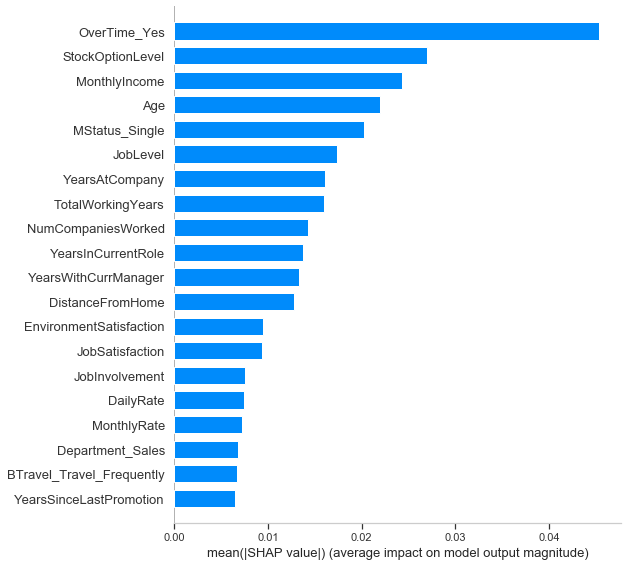

In [75]:
shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

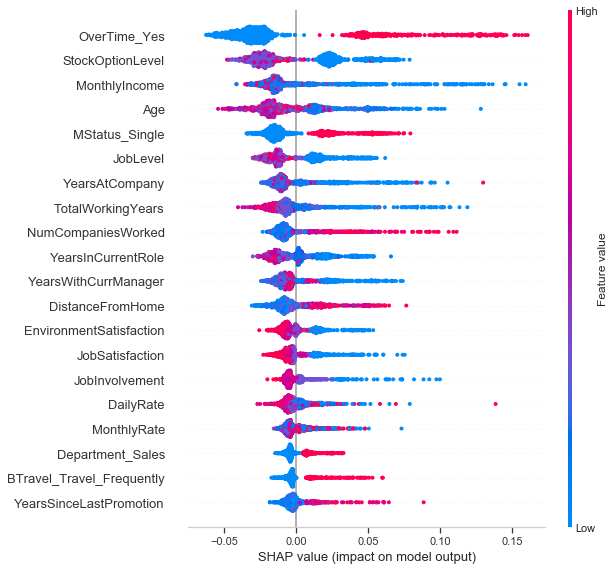

In [78]:
shap.summary_plot(shap_values[1], X_train)

In [87]:
shap.force_plot(explainer.expected_value[1],shap_values[1][0,:], X_train.iloc[0,:])

In [85]:
shap.force_plot(explainer.expected_value[1],shap_values[1][100,:], X_train.iloc[100,:])

In [81]:
shap.force_plot(explainer.expected_value[1],shap_values[1], X_train)

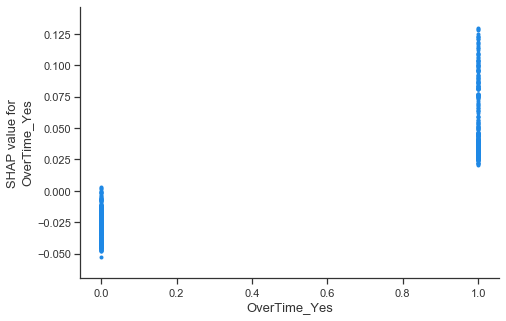

In [45]:
shap.dependence_plot("OverTime_Yes",shap_values_rfc[1],X_train,interaction_index=None)

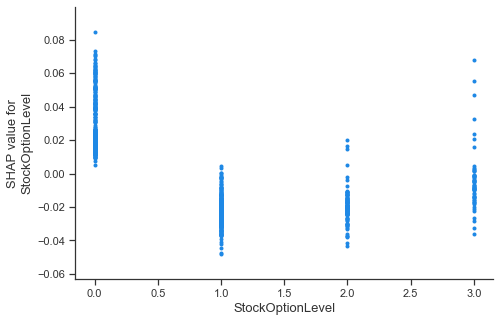

In [46]:
shap.dependence_plot("StockOptionLevel",shap_values_rfc[1],X_train,interaction_index=None)

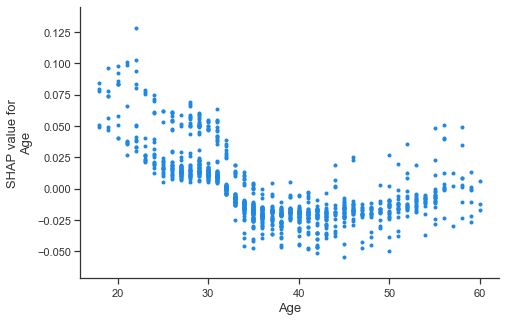

In [79]:
shap.dependence_plot("Age",shap_values[1],X_train,interaction_index=None)

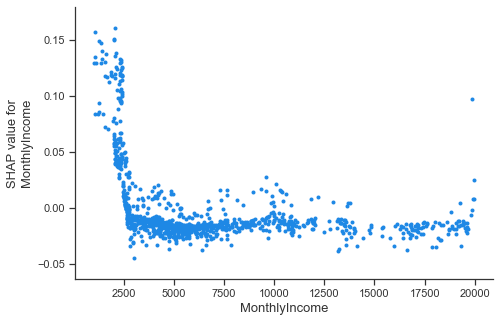

In [47]:
shap.dependence_plot("MonthlyIncome",shap_values_rfc[1],X_train,interaction_index=None)

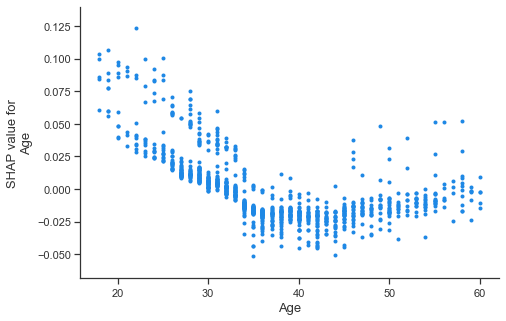

In [48]:
shap.dependence_plot("Age",shap_values_rfc[1],X_train,interaction_index=None)

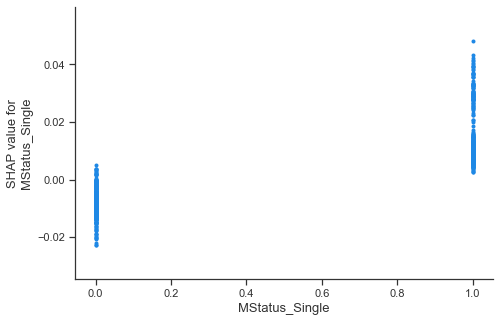

In [49]:
shap.dependence_plot("MStatus_Single",shap_values_rfc[1],X_train,interaction_index=None)